# Visualize lambdas

In this notebook we will visualize lambdas with normal 2D plots and circular plots

To run this notebook you must have the following files:
- "../analyzed_output/stages_comparison_df_ecadGFPnbG4.csv"

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

codeRepo = "/Users/krishna/PhD/WDeversion_theory/"
dataout = codeRepo + "/Experiments/analyzed_output/plots/" 
os.makedirs(dataout, exist_ok=True)
plt.style.use(codeRepo + 'src/WDeversion_theory_methods/seaborn-custom-whitegrid.mplstyle')

In [2]:
genotype = "ecadGFPnbG4"
#genotype = 'ecadGFPnbG4myoVI'
df_comparison = pd.read_csv(codeRepo + 'Experiments/analyzed_output/stages_comparison_df_' + genotype + '.csv')
df_comparison['roi'] = df_comparison['region']

In [3]:
C96hAEL = '#F9F06C'
C120hAEL = '#EBA434'
Cupcrawling = '#414042'
CwhitePupa = '#003399'
C2hAPF = '#0080FF'
C4hAPF = '#33FFFF'
C6hAPF = '#71C382'
CecadGFPnbG4 = '#404040'
CecadGFPnbG4myoVI = '#0099CC'


colors = {'ecadGFPnbG4': CecadGFPnbG4,
 'ecadGFPnbG4myoVI': CecadGFPnbG4myoVI,
          '96hAEL': C96hAEL,
          '120hAEL':C120hAEL,
 'wL3': Cupcrawling,
 '0hAPF': CwhitePupa,
 '2hAPF': C2hAPF,
 '4hAPF': C4hAPF,
 '6hAPF': C6hAPF}

devstage_combinations = pd.DataFrame({'devstage_init':['wL3','wL3','wL3',],
                                     'devstage_final':['0hAPF','2hAPF','4hAPF',],}
                                    )
rois = ["DV", "outDV"]
regions = rois

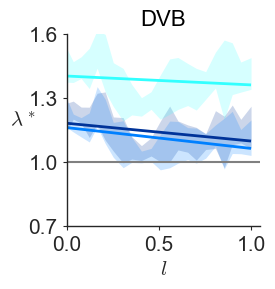

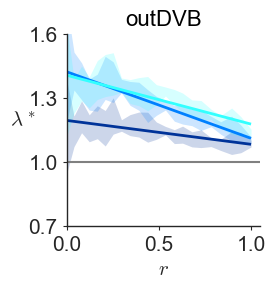

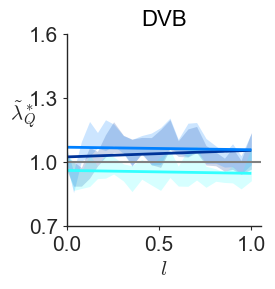

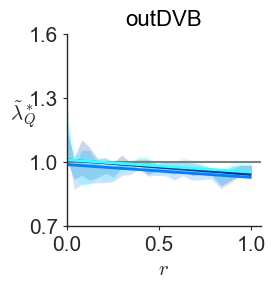

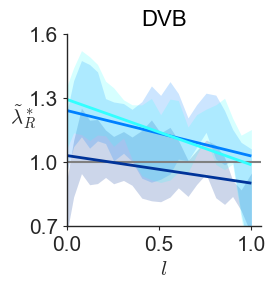

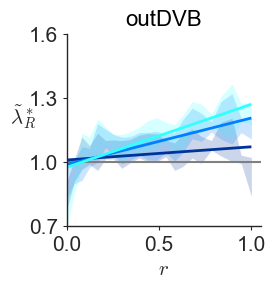

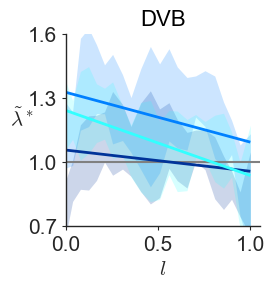

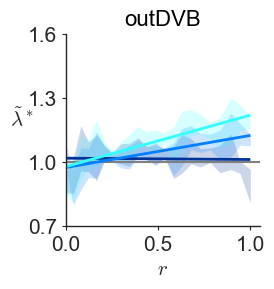

In [4]:
x_col = 'ref_pathlength_scaled'
props = ['lambda_isotropic', 'lambda_Q', 'lambda_rearrangement', 'lambda_anisotropic']
ylabels = [r'$\lambda^*$', r'$\tilde{\lambda}^*_{Q}$', r'$\tilde{\lambda}^*_{R}$', r'$\tilde{\lambda}^*$']
prop = props[0]
ylabel = ylabels[0]
for prop,ylabel in zip(props,ylabels):
    for i in range(len(rois)):
        fig,ax = plt.subplots(figsize = (2.5, 2.5)
                        )
        roi = rois[i]
        if roi == 'DV': 
            #style = '--' 
            xlabel = r'$l$'
            title = 'DVB'
            
        else:
            #style = '-' 
            xlabel = r'$r$'
            title = 'outDVB'
        style = '-' 
        ax.axhline(1, linestyle = '-', color ='grey')
        for j in range(len(devstage_combinations)):

            devstage_init = devstage_combinations.loc[j,'devstage_init']
            devstage_final = devstage_combinations.loc[j,'devstage_final']        
            
            ax.set_yticks(np.arange(0.7,2, 0.3))
            ax.set_xticks([0.0,0.5,1.0])
            query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'

            data = df_comparison.query(query_str)
            ax.fill_between(x = data[x_col], y1 = data[prop +'_mean'] - data[prop +'_std'], y2 = data[prop +'_mean'] + data[prop +'_std'],color = colors[devstage_final], alpha = 0.2, linewidth = 0)
            ax.plot(data[x_col], data['fit_' + prop +'_mean'], color = colors[devstage_final], linestyle = style, linewidth = 2)
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.set_xlabel(xlabel, rotation = 'horizontal')
            ax.set_ylabel(ylabel, rotation = 'horizontal')
            ax.set_title(title, loc ='center')
            ax.set_ylim(0.7,1.6)
            ax.set_xlim(0,1.05)       
        plt.savefig(dataout + genotype + prop + roi  + '_' + '_std_lamdavsP_cumulative_wFit_eversion.pdf',dpi = 600,bbox_inches = 'tight')
